## Problem statement
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim of this data science project is to build a predictive model and find out the sales of each product at a particular store.
## The Dataset
| Variable | Description |
| :----: | :---: |
| Item_Identifier | Unique product ID |
| Item_Weight | Weight of product | 
| Item_Fat_Content |	Whether the product is low fat or not |
| Item_Visibility	| The % of total display area of all products in a store allocated to the particular product |
| Item_Type | The category to which the product belongs |
| Item_MRP | Maximum Retail Price (list price) of the product |
| Outlet_Identifier | Unique store ID |
| Outlet_Establishment_Year |The year in which store was established |
| Outlet_Size |	The size of the store in terms of ground area covered |
| Outlet_Location_Type | The type of city in which the store is located |
| Outlet_Type | Whether the outlet is just a grocery store or some sort of supermarket |
| Item_Outlet_Sales | Sales of the product in the particular store. This is the outcome variable to be predicted. |

## Hypotheses generation
| Hypotheses name | Description | Variable |
| -------- | ---------- | ---------- |
| Store Capacity | Stores which are very big in size should have higher sales as they act like one-stop-shops and people would prefer getting everything from one place | outlet_size / outlet_type |
| Store location | Stores located closer to the recidential or office and companies will have higher sales because of easy access to customers. Also, stores that keep the right set of products to meet the local needs of customers will have higher sales. | outlet_location_type | 
| Store age | Personal relationships with local customers that have been built over the years will have a high impact on sales. | outlet_stablishment_year |
| Item Type | Daily use products should have higher sales as compared to specific use products. | item_type/item_weight |
| Fat Content | Items that have low fat content should have higher sales as there is an increase in health-conscious consumers. | item_fat_content |
| Display Area | Products which are given bigger shelves in the store, probably towards the entrance, are likely to catch attention first and sell more | item_visibility | 

## Importing the libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor


## Importing the dataset

In [2]:
dataset = pd.read_csv('Train.csv')
X = dataset.iloc[:,1:-1]
y = dataset.iloc[:,-1]

## Handling Missing Values

In [3]:
X.isnull().sum()

Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [4]:
y.isnull().sum()

0

In [5]:
""" LF=X['Item_Fat_Content']=='Low Fat'
R=X['Item_Fat_Content']=='Regular'
LF2=X['Item_Fat_Content']=='LF'
R2=X['Item_Fat_Content']=='reg'
LF3=X['Item_Fat_Content']=='low fat'

Low = LF + LF2 + LF3
REG = R + R2
X.loc[Low, "Item_Weight"]= X.loc[Low, "Item_Weight"].fillna(X.loc[Low, "Item_Weight"].mean())
X.loc[REG, "Item_Weight"]= X.loc[REG, "Item_Weight"].fillna(X.loc[REG, "Item_Weight"].mean())
 """

' LF=X[\'Item_Fat_Content\']==\'Low Fat\'\nR=X[\'Item_Fat_Content\']==\'Regular\'\nLF2=X[\'Item_Fat_Content\']==\'LF\'\nR2=X[\'Item_Fat_Content\']==\'reg\'\nLF3=X[\'Item_Fat_Content\']==\'low fat\'\n\nLow = LF + LF2 + LF3\nREG = R + R2\nX.loc[Low, "Item_Weight"]= X.loc[Low, "Item_Weight"].fillna(X.loc[Low, "Item_Weight"].mean())\nX.loc[REG, "Item_Weight"]= X.loc[REG, "Item_Weight"].fillna(X.loc[REG, "Item_Weight"].mean())\n '

In [6]:
""" X['Item_Fat_Content'] = X['Item_Fat_Content'].replace({'LF': 'Low Fat', 
                                                            'low fat': 'Low Fat', 
                                                            'reg': 'Regular'}) """

" X['Item_Fat_Content'] = X['Item_Fat_Content'].replace({'LF': 'Low Fat', \n                                                            'low fat': 'Low Fat', \n                                                            'reg': 'Regular'}) "

In [7]:
imputer1 = SimpleImputer(missing_values=np.nan, strategy='mean') 
imputer1.fit(X[['Item_Weight']])
X[['Item_Weight']] = imputer1.transform(X[['Item_Weight']])
imputer2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent') 
imputer2.fit(X[['Outlet_Size']])
X[['Outlet_Size']] = imputer2.transform(X[['Outlet_Size']])

In [8]:
print(pd.isnull(X).sum())

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64


## Data Exploration

In [9]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Identifier          8523 non-null   object 
 6   Outlet_Establishment_Year  8523 non-null   int64  
 7   Outlet_Size                8523 non-null   object 
 8   Outlet_Location_Type       8523 non-null   object 
 9   Outlet_Type                8523 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 666.0+ KB


In [10]:
X.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867
std,4.226124,0.051598,62.275067,8.371760
min,4.555000,0.000000,31.290000,1985.000000
25%,9.310000,0.026989,93.826500,1987.000000
50%,12.857645,0.053931,143.012800,1999.000000
75%,16.000000,0.094585,185.643700,2004.000000
max,21.350000,0.328391,266.888400,2009.000000


In [11]:
X.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
Item_Weight,1.000000,-0.012049,0.024756,-0.008301
Item_Visibility,-0.012049,1.000000,-0.001315,-0.074834
Item_MRP,0.024756,-0.001315,1.000000,0.005020
Outlet_Establishment_Year,-0.008301,-0.074834,0.005020,1.000000


In [12]:
cat=X.select_dtypes(include='object')
print(cat.columns)

Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')


In [13]:
num=X.select_dtypes(include=['int64','float64'])
print(num.columns)

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')


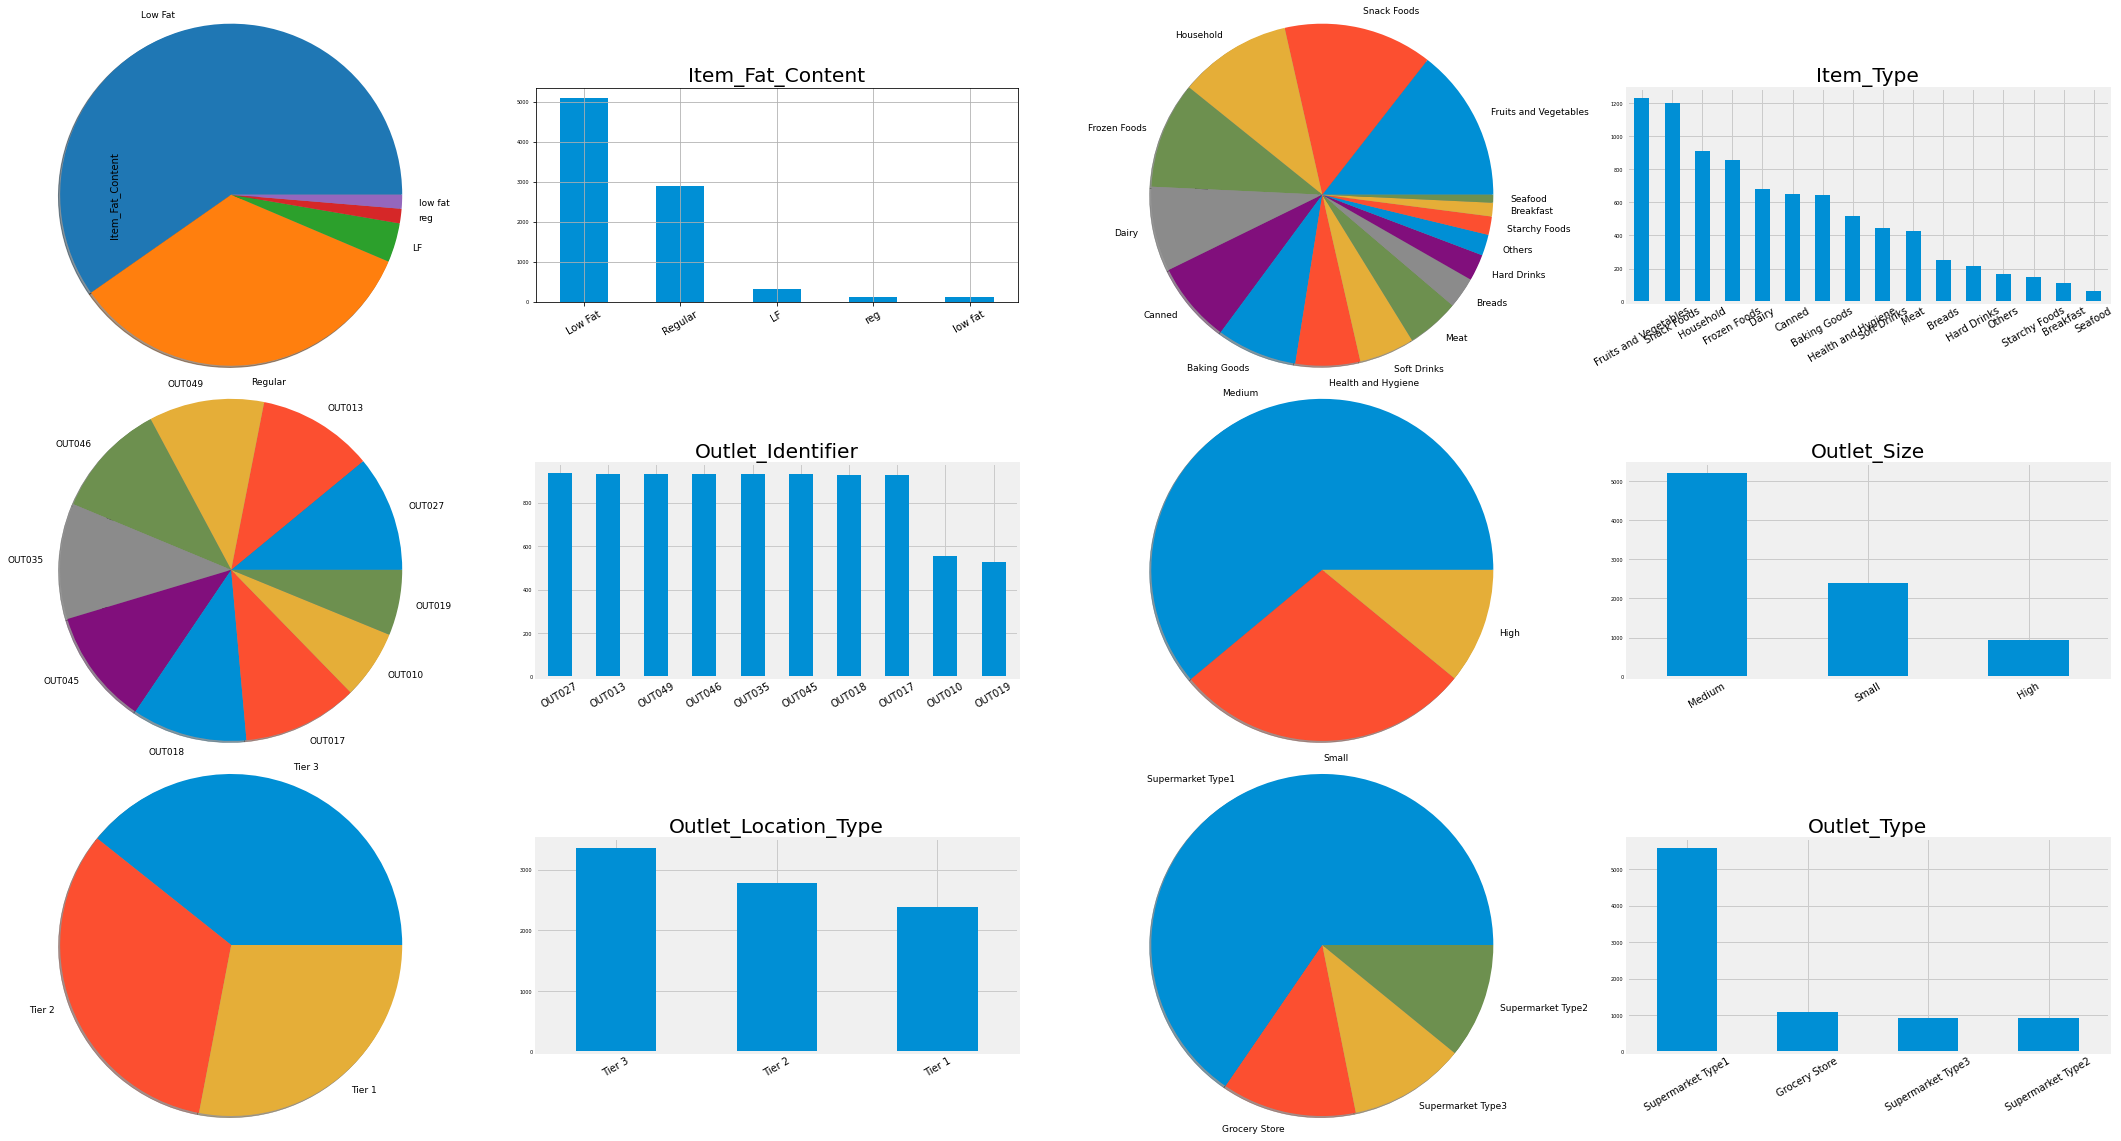

In [14]:
a=1
for C in cat:
    plt.subplot(4, 4, a)
    X[C].value_counts().plot.pie(shadow=True,radius=2,textprops={'fontsize': 9})
    a +=1
    plt.subplot(4, 4, a)
    plt.tight_layout()
    plt.style.use('fivethirtyeight')
    X[C].value_counts().plot.bar()
    fig=plt.gcf()
    fig.set_size_inches(30,20)
    plt.title('{0}'.format(C))
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=5)
    plt.xticks(rotation=30)
    a+=1

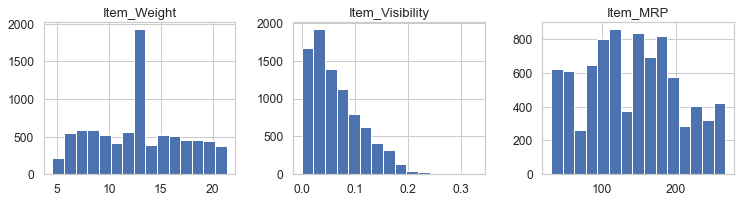

In [15]:
sns.set(style='whitegrid',font_scale=1.1,)
X[['Item_Weight', 'Item_Visibility', 'Item_MRP']].hist(bins=15, figsize=(15, 6), layout=(2, 4));

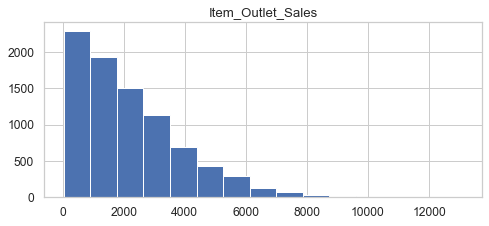

In [16]:
pd.DataFrame(y).hist(bins=15, figsize=(7, 3))
plt.title('Item_Outlet_Sales')
plt.show()

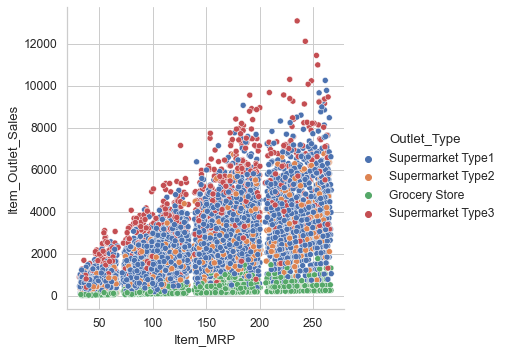

In [17]:
sns.pairplot(data=dataset, x_vars='Item_MRP', y_vars='Item_Outlet_Sales', hue='Outlet_Type', height=5)

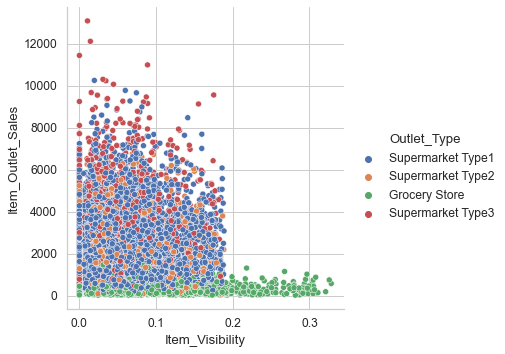

In [18]:
sns.pairplot(data=dataset, x_vars='Item_Visibility', y_vars='Item_Outlet_Sales', hue='Outlet_Type', height=5)

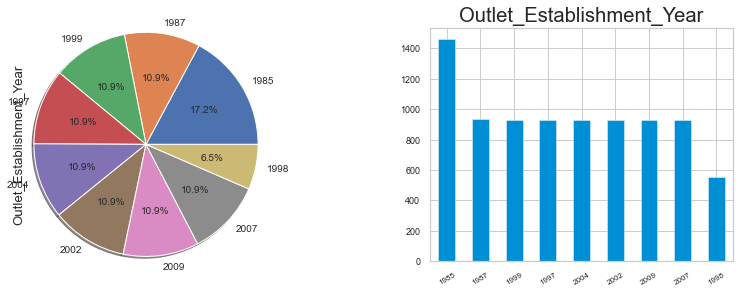

In [19]:
a = 1
num1=[ 'Outlet_Establishment_Year']
for cols in num1:
    plt.subplot(1, 2, a)
    X[cols].value_counts().plot.pie(shadow=True,autopct='%1.1f%%',radius=1.2,textprops={'fontsize': 10} )
    a +=1
    plt.subplot(1, 2, a)
    plt.tight_layout()
    plt.style.use('fivethirtyeight')
    X[cols].value_counts().plot.bar()
    fig=plt.gcf()
    fig.set_size_inches(12,4)
    plt.title('{0}'.format(cols))
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=9)
    plt.xticks(rotation=30)
    a+=1
    break

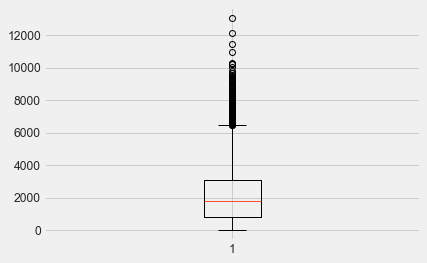

In [20]:
plt.boxplot(y)
plt.show()

In [21]:
y=y.values
y=y.reshape(-1,1)

## Scaler

In [22]:
sc = StandardScaler()
scX= StandardScaler()
y=sc.fit_transform(y)
X[['Item_Weight', 'Item_Visibility', 'Item_MRP','Outlet_Establishment_Year']]=scX.fit_transform(X[['Item_Weight', 'Item_Visibility', 'Item_MRP','Outlet_Establishment_Year']])

## encoding 


In [23]:
oh1 =OneHotEncoder(handle_unknown="ignore")
ct1 = ColumnTransformer(transformers = [('encoder',oh1,[1,3,9])], remainder ='passthrough')
X = np.array(ct1.fit_transform(X))

In [24]:
oh2 =OneHotEncoder(handle_unknown="ignore")
ct2= ColumnTransformer(transformers = [('encoder', oh2,[28])], remainder ='passthrough')
X = np.array(ct2.fit_transform(X))

In [25]:
le1 = LabelEncoder()
le2 = LabelEncoder()
X[:,39] = le1.fit_transform(X[:,39])
X[:,40] = le2.fit_transform(X[:,40])

## Splitting the dataset into the Training set and Test set

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## LinearRegression

In [27]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [28]:
y_pred=regressor.predict(X_test)
y_test = sc.inverse_transform(y_test)
y_pred = sc.inverse_transform(y_pred)
print("mae",mean_absolute_error(y_test, y_pred))
print("mse",mean_squared_error(y_test, y_pred))
print("Rmse",np.sqrt(mean_squared_error(y_test, y_pred)))

mae 793.5818068711418
mse 1149882.984066206
Rmse 1072.325969127954


## XGBoost

In [29]:
my_model = XGBRegressor(alpha=0.9,learning_rate=0.05, max_depth=5,n_estimators=80, random_state=30)
my_model.fit(X_train, y_train,verbose=False)

XGBRegressor(alpha=0.9, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.05, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=80, n_jobs=12,
             num_parallel_tree=1, predictor='auto', random_state=30,
             reg_alpha=0.899999976, reg_lambda=1, scale_pos_weight=1,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [30]:
y_pred=my_model.predict(X_test)
y_pred = sc.inverse_transform(y_pred)
print("mae",mean_absolute_error(y_test, y_pred))
print("mse",mean_squared_error(y_test, y_pred))
print("Rmse",np.sqrt(mean_squared_error(y_test, y_pred)))

mae 723.0182245169024
mse 1065131.5781439054
Rmse 1032.0521198776278


## GradientBoostingRegressor


In [31]:
model = GradientBoostingRegressor(alpha=0.9,learning_rate=0.05, max_depth=5, min_samples_leaf=3, min_samples_split=2, n_estimators=80, random_state=10)
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
y_pred = sc.inverse_transform(y_pred)
print("mae",mean_absolute_error(y_test, y_pred))
print("mse",mean_squared_error(y_test, y_pred))
print("Rmse",np.sqrt(mean_squared_error(y_test, y_pred)))

c:\Users\Ruby\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


mae 722.8937116005973
mse 1073114.3848717927
Rmse 1035.9123442028254


## PRED ON TEST

In [32]:
test = pd.read_csv('Test.csv').iloc[:,1:]

In [33]:
pd.DataFrame(test).isnull().sum()

Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [34]:
""" LF=test['Item_Fat_Content']=='Low Fat'
R=test['Item_Fat_Content']=='Regular'
LF2=test['Item_Fat_Content']=='LF'
R2=test['Item_Fat_Content']=='reg'
LF3=test['Item_Fat_Content']=='low fat'

Low = LF + LF2 + LF3
REG = R + R2
test.loc[Low, "Item_Weight"]= test.loc[Low, "Item_Weight"].fillna(test.loc[Low, "Item_Weight"].mean())
test.loc[REG, "Item_Weight"]= test.loc[REG, "Item_Weight"].fillna(test.loc[REG, "Item_Weight"].mean()) """

' LF=test[\'Item_Fat_Content\']==\'Low Fat\'\nR=test[\'Item_Fat_Content\']==\'Regular\'\nLF2=test[\'Item_Fat_Content\']==\'LF\'\nR2=test[\'Item_Fat_Content\']==\'reg\'\nLF3=test[\'Item_Fat_Content\']==\'low fat\'\n\nLow = LF + LF2 + LF3\nREG = R + R2\ntest.loc[Low, "Item_Weight"]= test.loc[Low, "Item_Weight"].fillna(test.loc[Low, "Item_Weight"].mean())\ntest.loc[REG, "Item_Weight"]= test.loc[REG, "Item_Weight"].fillna(test.loc[REG, "Item_Weight"].mean()) '

In [35]:
""" test['Item_Fat_Content'] = test['Item_Fat_Content'].replace({'LF': 'Low Fat', 
                                                                'low fat': 'Low Fat', 
                                                                'reg': 'Regular'}) """

" test['Item_Fat_Content'] = test['Item_Fat_Content'].replace({'LF': 'Low Fat', \n                                                                'low fat': 'Low Fat', \n                                                                'reg': 'Regular'}) "

In [36]:
test[['Item_Weight']] = imputer1.transform(test[['Item_Weight']])
test[['Outlet_Size']] = imputer2.transform(test[['Outlet_Size']])

In [37]:
pd.DataFrame(test).isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [38]:
test[['Item_Weight', 'Item_Visibility', 'Item_MRP','Outlet_Establishment_Year']]=scX.transform(test[['Item_Weight', 'Item_Visibility', 'Item_MRP','Outlet_Establishment_Year']])

In [39]:
test = np.array(ct1.transform(test))
test = np.array(ct2.transform(test))

In [40]:
test[:,39] = le1.transform(test[:,39])
test[:,40] = le2.transform(test[:,40])

In [41]:
#my_model = XGBRegressor(alpha=0.9,learning_rate=0.05, max_depth=5,n_estimators=80, random_state=30)
my_model = GradientBoostingRegressor(alpha=0.9,learning_rate=0.05, max_depth=5, min_samples_leaf=3, min_samples_split=2, n_estimators=80, random_state=10)
my_model.fit(X, y)

c:\Users\Ruby\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GradientBoostingRegressor(learning_rate=0.05, max_depth=5, min_samples_leaf=3,
                          n_estimators=80, random_state=10)

In [42]:
y_test_pred = my_model.predict(test)

In [43]:
y_test_pred = sc.inverse_transform(y_test_pred)

In [44]:
pd.DataFrame(y_test_pred).head(15)

,0
0,1676.059734
1,1389.644110
2,643.288573
3,2455.474219
4,5975.270996
5,1918.369340
6,686.474939
7,2213.896757
8,1504.909828
9,3155.342965


In [45]:
final = pd.read_csv('Test.csv')
final['Item_Outlet_Sales']=y_test_pred
final=final.drop(['Item_Weight','Item_Fat_Content','Item_Visibility','Item_Type','Item_MRP','Outlet_Establishment_Year','Outlet_Size','Outlet_Location_Type','Outlet_Type'],axis=1)
final.to_csv("Final_Test_Pred.csv",index=False)

In [46]:
print(final['Item_Outlet_Sales'].min()) ##To make sure there is no negtive values

100.01874967345566
